In [24]:
import numpy as np
import pandas as pd

# Install necessary libraries
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise import accuracy

## Import datasets

In [35]:
data = pd.read_csv('./datasets/merged.csv')
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

train.head()

,user_id,movie_id,rating
0,1198,434,5
1,5949,1729,4
2,5046,308,5
3,3735,909,4
4,5960,2918,4


In [36]:
# Define the reader object and load the data into Surprise's dataset format
reader = Reader(rating_scale=(1, 5))
trainset, testset = Dataset.load_from_df(train, reader), Dataset.load_from_df(test, reader)
trainset, testset = trainset.build_full_trainset(), testset.build_full_trainset().build_testset()

# Item-based KNN collaborative filtering model 
- input user_id & desired number of similar users, and will recommend movies rated by similar users  

#### Why KNN?

1. Simplicity and Interpretability

2. Collaborative Filtering

KNN works well in collaborative filtering, a common approach in recommendation systems. This is where the algorithm recommends movies based on similarities between users (user-based collaborative filtering) or between movies (item-based collaborative filtering). For example, in item-based filtering, KNN recommends movies similar to the ones a user has liked in the past by comparing the movie’s features.

3. Good for Small to Medium Datasets

KNN performs relatively well on small to medium datasets without requiring extensive training. Since it operates by calculating distances between data points, it works best when the dataset isn’t too large or when computing power is sufficient. For larger datasets, optimizations or alternative models like matrix factorization or deep learning might be necessary.

4. Adaptability to Feature Similarity

KNN can be adapted to various similarity metrics, such as Euclidean distance, cosine similarity, or Pearson correlation, depending on how you define movie similarity. For instance, cosine similarity might work well when comparing users’ rating patterns or the attributes of movies.

5. Cold Start Problem

However, KNN is computationally expensive when dealing with very large datasets and may not capture complex relationships between movies or users as effectively as other models (e.g., matrix factorization or deep learning).

Surpise KNNBasic model documentation : https://surprise.readthedocs.io/en/stable/knn_inspired.html

### Distancing & Error metric

> Similarity Measures

Cosine and Pearson similarity measures are commonly used in KNN-based collaborative filtering because they help quantify the degree of similarity between two vectors (users or items) based on their rating patterns. 


<b> Similarity measures </b>

> Cosine Similarity

Cosine similarity measures the cosine of the angle between two non-zero vectors (such as user or item rating vectors) in an n-dimensional space

- Independent of Magnitude: 

        Cosine similarity focuses on the direction rather than the magnitude of the vectors. users may rate movies very differently in absolute terms, but if the pattern of their ratings (e.g., which movies they rate high or low) is similar, they will be considered similar.

- Good for Sparse Data: 

        Cosine similarity works well in cases where the user-item matrix is sparse (contains many missing values). Since it only looks at the ratings for items both users have rated, it ignores missing values.

- Captures Similar Preferences: 

        Cosine similarity captures how similarly users behave in terms of their preferences (even if their ratings scale is different), which is especially useful when recommending items based on similar preferences.

> Pearson Correlation

Pearson correlation measures the linear correlation between two variables. It evaluates how well the ratings of two users (or items) can be described as a linear relationship.

- Removes Rating Bias: 

        Pearson correlation centers the ratings by subtracting the user’s average rating. This is important because some users tend to give generally higher ratings than others. Pearson correlation can capture how users deviate from their own average behavior, allowing it to ignore differences in absolute rating levels.
- Captures Linear Relationships: 

        Pearson correlation is useful when you’re interested in linear relationships between users or items. For example, if two users consistently rate movies relative to their preferences (e.g., one user may rate 4, 5, 3, and another may rate 2, 3, 1), Pearson will capture that they have similar relative preferences.
- Normalizes Ratings: 

        Since it normalizes the ratings by subtracting the mean, Pearson correlation is effective when users have different rating scales. It focuses on the relative difference in ratings rather than absolute scores.


> Error metrics
- MSE evaluates how closely the predicted ratings match the true ratings
- MSE is the square root of MSE, which makes it more interpretable because it’s in the same units as the ratings 
- MAE measures the average magnitude of errors between predicted and true ratings, without considering the direction of the errors

### Hyperparameter tuning

In [27]:
train_rmses, train_maes, test_rmses, test_maes = [], [], [], []
ks = list(range(35, 47, 1))

for k in ks:

    print("For k value : {} --> KNN item-based collaborative filtering model".format(k))

    # Define the KNNBasic algorithm parameters
    sim_options = {
        'name': 'cosine',
        'user_based': False,  # Set to False to use item-based collaborative filtering
    }

    # Create the KNN model
    knn_model = KNNBasic(k=k, sim_options=sim_options, verbose = False)

    # Train the model on the training set
    knn_model.fit(trainset)

    # Get predictions & accuracy for the training set
    train_predictions = knn_model.test(trainset.build_testset())
    train_rmse = accuracy.rmse(train_predictions)
    train_mae = accuracy.mae(train_predictions)
    train_rmses.append(train_rmse)
    train_maes.append(train_mae)


    # Get predictions & accuracy for the test set
    predictions = knn_model.test(testset)

    test_rmses.append(accuracy.rmse(predictions))
    test_maes.append(accuracy.mae(predictions))


For k value : 35 --> KNN item-based collaborative filtering model
RMSE: 0.8943
MAE:  0.6950
RMSE: 0.9982
MAE:  0.7791
For k value : 36 --> KNN item-based collaborative filtering model
RMSE: 0.8958
MAE:  0.6963
RMSE: 0.9981
MAE:  0.7791
For k value : 37 --> KNN item-based collaborative filtering model
RMSE: 0.8973
MAE:  0.6975
RMSE: 0.9980
MAE:  0.7791
For k value : 38 --> KNN item-based collaborative filtering model
RMSE: 0.8986
MAE:  0.6987
RMSE: 0.9980
MAE:  0.7792
For k value : 39 --> KNN item-based collaborative filtering model
RMSE: 0.9000
MAE:  0.6998
RMSE: 0.9979
MAE:  0.7791
For k value : 40 --> KNN item-based collaborative filtering model
RMSE: 0.9015
MAE:  0.7010
RMSE: 0.9978
MAE:  0.7791
For k value : 41 --> KNN item-based collaborative filtering model
RMSE: 0.9028
MAE:  0.7020
RMSE: 0.9979
MAE:  0.7793
For k value : 42 --> KNN item-based collaborative filtering model
RMSE: 0.9040
MAE:  0.7031
RMSE: 0.9978
MAE:  0.7793
For k value : 43 --> KNN item-based collaborative filter

In [28]:
"""
Ks :  [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
Train RMSE :  [0.7793636868439465, 0.8227726884361647, 0.8460848873582878, 0.8623359331166043, 0.8745910282979678, 0.8843737542514639, 0.8927737578256102, 0.899887388266644, 0.9061536107125806, 0.9116928308439499, 0.916684944605763, 0.9211579892038986, 0.9253347863638701, 0.929151365932699, 0.9327231288356129, 0.9360488616153929, 0.9390868669399419, 0.9419645730348497, 0.9446622809124469]
Train MAE :  [0.5924613296707559, 0.6355125161003281, 0.6556883500336964, 0.6692554913193154, 0.6793641915687684, 0.6874359526890961, 0.6944267473389668, 0.7003875921146165, 0.7057047515606564, 0.7104279002187686, 0.7148025717397848, 0.7187393011897457, 0.7224877888803295, 0.7259258406479884, 0.7291500970635431, 0.7321855318284509, 0.7350213700772928, 0.7376852465079435, 0.7402055133519454]
Test RMSE :  [1.09113468305196, 1.0367183743019732, 1.0177870555002873, 1.0090300131424663, 1.0047541674112075, 1.0020744247534925, 1.0006542860640322, 1.000071198947029, 0.9998105711557628, 0.9999995060457173, 1.000169318002006, 1.0004425712084575, 1.0008029875716187, 1.001388483876409, 1.0019836440310423, 1.0024414261504313, 1.0031280507987097, 1.003770584224303, 1.0043444603775868]
Test MAE :  [0.8438602110904961, 0.8055631163801058, 0.7919512970942335, 0.7860054060199522, 0.7832101637284969, 0.7815951812560412, 0.7808312830701344, 0.7807666191278518, 0.7809335347305092, 0.7814481397265474, 0.7819929537691004, 0.7825829464338115, 0.783273563599371, 0.7841266071262301, 0.7850367587194621, 0.7858645706406273, 0.7868422125379873, 0.7877082593358835, 0.7885813017249352]

Ks :  [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train RMSE :  [0.899887388266644, 0.9012299091802305, 0.9025175146292307, 0.9037707314426078, 0.9049871407590719, 0.9061536107125806, 0.9073037846390348, 0.9084673843570331, 0.9095453413592125, 0.9106136789224871, 0.9116928308439499]
Test RMSE :  [1.000071198947029, 1.0000294269982832, 0.9999851293503367, 0.9998931428318999, 0.9998134504273414, 0.9998105711557628, 0.9998184303713664, 0.9998957603509276, 0.9999306274399361, 0.9999786358806374, 0.9999995060457173]
Train MAE :  [0.7003875921146165, 0.7015355806266379, 0.702615748837752, 0.7036876872756077, 0.7047185665465391, 0.7057047515606564, 0.706689640317092, 0.707660873108066, 0.7085736405248557, 0.7095051024748853, 0.7104279002187686]
Test MAE :  [0.7807666191278518, 0.7808375812588236, 0.7808904633155902, 0.7809065644817833, 0.7808865233889343, 0.7809335347305092, 0.7810128168648952, 0.7811842578271277, 0.7812429541984895, 0.7813235744465197, 0.7814481397265474]

Ks :  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Train RMSE :  [0.8942717475257902, 0.8957935969527088, 0.8972519055678716, 0.8986386377535697, 0.9000292687032027, 0.9014510006222295, 0.9027820105135707, 0.9040358289912915, 0.9052782359254624, 0.9064980744768718, 0.9076762093700568, 0.9088384925040133]
Test RMSE :  [0.9981712707454355, 0.9980943438717678, 0.9980174959136755, 0.9979906180770853, 0.9978503812223473, 0.9978326617962954, 0.9978549635986381, 0.9978028930284678, 0.9977796968525564, 0.997846133540571, 0.9979255577414622, 0.9979389558119995]
Train MAE :  [0.6950125930861831, 0.6962708848503845, 0.6975042467103026, 0.6986760400874571, 0.6997998251731598, 0.7009546382961473, 0.7020353814597728, 0.7030737614127306, 0.7041309587090449, 0.7051646598612699, 0.7061621993220617, 0.7071530187538249]
Test MAE :  [0.779068431414486, 0.7790541857052193, 0.7791363787209876, 0.7791969515526336, 0.7790736855907505, 0.7791399284605834, 0.7792536826210009, 0.7793029912219621, 0.7793505493865072, 0.7794512364340948, 0.7795369815118522, 0.7796226958429326]

"""

# Print RMSE and MAE scores of train and test set
print("Ks : ", ks)
print("Train RMSE : ", train_rmses)
print("Test RMSE : ", test_rmses)
print("Train MAE : ", train_maes)
print("Test MAE : ", test_maes)

Ks :  [35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]
Train RMSE :  [0.8942717475257902, 0.8957935969527088, 0.8972519055678716, 0.8986386377535697, 0.9000292687032027, 0.9014510006222295, 0.9027820105135707, 0.9040358289912915, 0.9052782359254624, 0.9064980744768718, 0.9076762093700568, 0.9088384925040133]
Test RMSE :  [0.9981712707454355, 0.9980943438717678, 0.9980174959136755, 0.9979906180770853, 0.9978503812223473, 0.9978326617962954, 0.9978549635986381, 0.9978028930284678, 0.9977796968525564, 0.997846133540571, 0.9979255577414622, 0.9979389558119995]
Train MAE :  [0.6950125930861831, 0.6962708848503845, 0.6975042467103026, 0.6986760400874571, 0.6997998251731598, 0.7009546382961473, 0.7020353814597728, 0.7030737614127306, 0.7041309587090449, 0.7051646598612699, 0.7061621993220617, 0.7071530187538249]
Test MAE :  [0.779068431414486, 0.7790541857052193, 0.7791363787209876, 0.7791969515526336, 0.7790736855907505, 0.7791399284605834, 0.7792536826210009, 0.7793029912219621, 0.779350549

<AxesSubplot:title={'center':'MAE of KNN clf model on k'}>

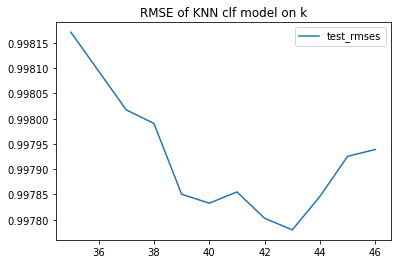

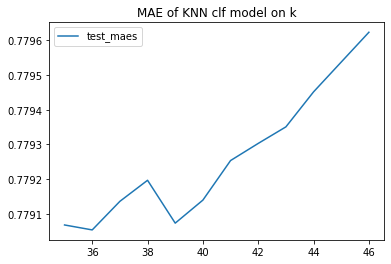

In [29]:
rmses = pd.DataFrame({
    #"train_rmses": train_rmses, 
    "test_rmses": test_rmses, 
}, index = ks
)

maes = pd.DataFrame({
    #"train_maes": train_maes,
    "test_maes": test_maes,
}, index = ks
)

rmses.plot(title= "RMSE of KNN clf model on k")
maes.plot(title= "MAE of KNN clf model on k")

## Final model development

Optimal k value is 40. Considering train_rmse, test_rmse, test_mae

In [37]:
k_value = 40

# Create the KNN model
knn_clf = KNNBasic(k=k_value, sim_options=sim_options, verbose = False)

# Train the model on the training set
knn_clf.fit(trainset)

# Get predictions & accuracy for the training set
train_predictions = knn_clf.test(trainset.build_testset())
accuracy.rmse(train_predictions)
accuracy.mae(train_predictions)

# Get predictions & accuracy for the test set
predictions = knn_clf.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9015
MAE:  0.7010
RMSE: 0.9978
MAE:  0.7791


0.7791399284605834

In [39]:
# Function to recommend movies for a given user
def get_movie_recommendations(user_id, k=5):
    # Get all movie IDs
    all_movie_ids = data['movie_id'].unique()
    
    # Get movie IDs that the user has already rated
    user_rated_movies = data[data['user_id'] == user_id]['movie_id'].tolist()
    
    # Predict ratings for all movies that the user hasn't rated
    movie_predictions = []
    for movie_id in all_movie_ids:
        if movie_id not in user_rated_movies:
            pred = knn_clf.predict(user_id, movie_id)
            movie_predictions.append((movie_id, pred.est))
    
    # Sort by predicted rating and return top k recommendations
    movie_predictions.sort(key=lambda x: x[1], reverse=True)
    top_k_recommendations = movie_predictions[:k]
    
    return top_k_recommendations

# Example: Get movie recommendations for user with ID 1
recommendations = get_movie_recommendations(1)
print(f"Top movie recommendations for user 1: {recommendations}")

Top movie recommendations for user 1: [(3209, 5), (657, 5), (127, 5), (3323, 5), (3382, 5)]


In [38]:
import pickle

# Save the model to a file
with open('./models/knn_clf.pkl', 'wb') as file:
    pickle.dump(knn_clf, file)


# Scratchpad

### Normalization by the average of individual user's rating

Idea : Normalize by extracting mean value per user based on the non-zero ratings of each user to non-zero ratings in the user-item matrix.

Modified matrix will have value ranging from -4 to 4 at theoratical maximum and minimum.
NaN values from the original user_item matrix has no preference on each movie. In our new scale of data, 0 is still the value represents no preference. As both non-viewed movies and the movies received exact mean scores of non-zero ratings of the user will have 0 score.

In [18]:
# create user-item matrix 
user_to_movie = train.pivot(index = 'user_id', columns='movie_id', values='rating').fillna(0)
user_item_matrix = train.pivot(index = 'user_id', columns = 'movie_id', values = 'rating').fillna(0)

# Users' average rating on non-zero rating. We deal this rating as no preference. Neither good nor bad as well as non rated movies.
user_rating_avg = user_item_matrix.apply(lambda row: row[row != 0].mean(), axis=1)

# Function to apply subtraction based on a provided value list
def subtract_non_zero_by_row(row, sub_value):
    # Iterate through each element in the row and subtract the corresponding value only from non-zero elements
    return [val - sub_value if val != 0 else val for val in row]

# Apply the function row-by-row using the subtraction values list
modified_df = user_item_matrix.apply(lambda row: subtract_non_zero_by_row(row, user_rating_avg[row.name]), axis=1, result_type='expand')

user_id
1       4.157895
2       3.700000
3       3.923077
4       4.166667
5       3.135714
          ...   
6036    3.326625
6037    3.679487
6038    3.812500
6039    3.897959
6040    3.575875
Length: 6040, dtype: float64

<AxesSubplot:>

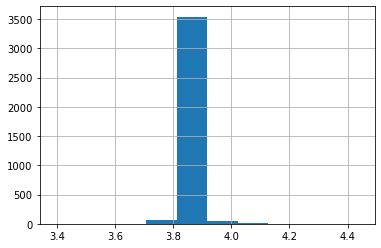

In [20]:
# train KNN model
from sklearn.neighbors import NearestNeighbors

knn_cf = NearestNeighbors(metric='cosine', algorithm='brute')
knn_cf.fit(modified_df)

# Returns average rating per each movie based on the nearest k nearest neighbors found based on the preference on movies. Default is 5.
def clf(user_id, k = 50):
    user_idx = users[users['user_id'] == user_id].index
    user_vect = modified_df.iloc[user_idx, :]

    distances_cf, idx_cf = knn_cf.kneighbors(
        user_vect,
        n_neighbors = k
    )

    predicted_nn = modified_df.iloc[idx_cf[0]].apply(lambda row: row + user_rating_avg[row.name] , axis=1)

    return predicted_nn.apply(np.mean, axis=0)

prediction = clf(1)
prediction.hist()

def get_top_k_movies_rated(user_id, num_recommendations = 5):
    return merged[merged['user_id'] == user_id].sort_values(
        ['rating', 'timestamp'], 
        ascending = False
    ).iloc[:num_recommendations]['title'].values


def get_top_k_movie_recommendations(user_id, k, num_recommendations = 5):
    # indices of top n movies.
    movie_indices = clf(user_id, k).sort_values(ascending = False).iloc[:num_recommendations].index
    return user_item_matrix.iloc[:, movie_indices].columns

def print_knn_result(user_id, num_recommendations = 5):
    print(f'Top {num_recommendations} movies rated by user {user_id}:')
    for movie_name in get_top_k_movies_rated(user_id):
        print(f'\t{movie_name}')        

    print(f'Recommended movies by similar users (collaborative filtering): ')
    for recs in get_top_k_movie_recommendations(user_id):
        print(f'\t{recs}')

print_knn_result(1)

In [86]:
import numpy as np
from pprint import pprint

def get_similar_users(user, n = 5):
    knn_input = np.asarray([user_to_movie.values[user-1]])
        # get user's row from user-item matrix
    distances, indices = knn.kneighbors(knn_input, n_neighbors = n+1)

    print(" ")
    print("Top", n, "users who are very much similar to the User ", user, "are: ")
    for i in range(1,len(distances[0])):
        print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
        
    return indices.flatten()[1:] + 1, distances.flatten()[1:]

def recommend_n_movies(user_id, n_similar_users, n_movie_recs):
    print(f'Movies seen by User {user_id}:')
    pprint(list(merged[merged['user_id'] == user_id]['title']))

    # get n_similar_users and their cosine similarity distances
    similar_users, distance_list = get_similar_users(user_id, n_similar_users)

    # define weights to ratings by each similar user based on distance
        # -> eliminates chance of decision manipulation by users relatively far from input user
    weightage_list = distance_list / np.sum(distance_list)
    
    # get ratings of all movies from similar users
    mov_ratings_sim_users = user_to_movie.loc[similar_users]
    movies_id_list = user_to_movie.columns
    
    # transform to make it compatible for matrix operations
    weightage_list = weightage_list[:, np.newaxis] + np.zeros(len(movies_id_list))
    
    # apply the weights to user ratings
    new_rating_matrix = weightage_list * mov_ratings_sim_users
    
    # get the mean ratings
    mean_rating_list = new_rating_matrix.sum(axis = 0)

    # get n movie indices with the highest mean
        # FIX: remove movies already seen by user
    highest_score_idx = np.argsort(mean_rating_list)[::-1][:n_movie_recs]
    rec_movie_ids = new_rating_matrix.iloc[:, highest_score_idx].columns
    
    print(" ")
    print(f"Top {n_movie_recs} movie recommendations to user {user_id}:")
    rec_movies = []
    for rec_movie_id in rec_movie_ids:
        movie_title = movies[movies['movie_id'] == rec_movie_id]['title'].values[0]
        rec_movies.append(movie_title)
        print(f"\t{movie_title}")

    return rec_movies

In [ ]:
# Fix wrong input by user
from fuzzywuzzy import fuzz

def get_title_from_id(id):
    # convert idx to title
    return movies[movies['movie_id'] == id]['title'].values[0]

def get_id_from_title(title):
    # convert title to idx
    return movies[movies['title'] == title]['movie_id'].values[0]
    
def matching_score(a, b):
    # calculate the Levenshtein distance to find closest title
        # if exactly same score == 100
    return fuzz.ratio(a, b) 

def find_closest_title(title):
    leven_scores = list(enumerate(movies['title'].apply(matching_score, b = title)))
    sorted_lev_scores = sorted(leven_scores, key = lambda x: x[1], reverse = True)

    closest_idx = sorted_lev_scores[0][0]
    closest_movie = movies.loc[closest_idx]
    distance_score = sorted_lev_scores[0][1]

    closest_movie_id = closest_movie['movie_id']
    closest_movie_title = closest_movie['title']
    
    return (closest_movie_id, closest_movie_title, distance_score)

def rec_movies_by_name(movie_name, n_movie_recs = 10):
    closest_id, closest_movie, distance_score = find_closest_title(movie_name)
    if distance_score != 100:
        movie_name = closest_movie
        print(f"Did you mean {movie_name}?")
    
    movie_id = get_id_from_title(movie_name)

    knn_input = np.asarray([movie_to_user.values[movie_id]])

    movie_ids_list = movie_to_user.index
    n = min(len(movie_ids_list), n_movie_recs)
        # if n_movie_recs goes over number of movies, revert to all movies
    distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors = n + 1) 

    print(f"Top {n} movies which are very similar to movie {movie_name} are: \n")
    for i in range(1, len(distances[0])):
        movie_id = movie_ids_list[indices[0][i]]
        movie_title = get_title_from_id(movie_id)
        print(movie_title)

movie_title = 'willy woka choco'
rec_movies_by_name(movie_title, 20)

In [ ]:
# !! ARCHIVED !! For initial content-based rec model that takes movie name instead of user id as input
# Fuzzy string matching to fix wrong movie input by user
from pprint import pprint
from fuzzywuzzy import fuzz

def get_movie_from_idx(idx):
    # get movie details from idx
    title = content_rec.loc[idx, 'title']
    year = content_rec.loc[idx, 'year']

    return title, year
    
def get_idx_from_title(title):
    # convert title to idx
    return content_rec[content_rec['title'] == title].index.values[0]

# Fix wrong input by user
def matching_score(a, b):
    # calculate the Levenshtein distance to find closest title
        # if exactly same score == 100
    return fuzz.ratio(a, b) 
    
def find_closest_title(title):
    leven_scores = list(enumerate(content_rec['title'].apply(matching_score, b = title)))
    sorted_lev_scores = sorted(leven_scores, key = lambda x: x[1], reverse = True)

    closest_idx = sorted_lev_scores[0][0]
    closest_movie = content_rec.loc[closest_idx]
    distance_score = sorted_lev_scores[0][1]

    closest_movie_id = closest_movie['movie_id']
    closest_movie_title = closest_movie['title']
        
    return (closest_movie_id, closest_movie_title, distance_score)

In [ ]:
"""
from scipy.sparse import csr_matrix

# since we're using cosine similarity, we can fill with 0 
# cosine similarity does not take magnitude to account
refined = merged.groupby(['user_id', 'movie_id'], as_index = False).agg({'rating': 'mean'})

# create user-item matrix 
user_to_movie = refined.pivot(index = 'user_id', columns='movie_id', values='rating').fillna(0)
# convert to csr matrix for efficiency (sparse matrix optimization)
user_to_movie_sparse = csr_matrix(user_to_movie.values)

user_item_matrix = merged.pivot(index = 'user_id', columns = 'title', values = 'rating').fillna(0)
user_item_csr = csr_matrix(user_item_matrix.values)
user_item_matrix
"""